<a href="https://colab.research.google.com/github/henrigeuer/stratosphaerenflug/blob/main/strato_auswerung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Datenauswerung mit Python
Um zu beginnen, die einzelnen Codeabschnitte in ihrer Reihenfolge ausführen.



##Importieren der benötigten Bibliotheken
Die Bibliotheken numpy und mathplotlib dollrn verwendet werden, um die Daten darzustellen

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import random

##Laden der Messwerte aus Github
Bevor wir mit den Daten arbeiten können, müssen wir sie zunächst erstmal laden.
Die Rohdaten befinden sich ebenfalls im Github Reposotory. Von dort werden sie nun, zunächst als String, geladen.

In [19]:
#Laden des Github Repositories
!git clone https://github.com/henrigeuer/stratosphaerenflug.git

fatal: destination path 'stratosphaerenflug' already exists and is not an empty directory.


In [99]:
#Speichern der Dateipfade
path_arduino = "/content/stratosphaerenflug/LOG.TXT"
path_strato = "/content/stratosphaerenflug/F_24.LOG"

#Öffnen der Dateien
file_arduino = open(path_arduino)
file_strato = open(path_strato)

#Zwischenpeichern der Daten
data_arduino = file_arduino.read()
data_strato = file_strato.read()

#Schließen der Dateien
file_arduino.close()
file_strato.close()

## Vorbereiten der Messwerte
Um die Daten grafisch darstellen zu können, müssen wir sie nun weiter Verarbeiten. Dabei sollen alle gemessenen Daten in einzelne Listen gespeichert werden 

In [181]:
#Daten des Arduino
#Nach Zeilen trennen
data_arduino_rows = data_arduino.split("\n")
#Leere Zeilen entfernen
while "" in data_arduino_rows:
  data_arduino_rows.remove("")
#erste Zeile entfernen
data_arduino_rows.pop(0)

#Aufteilen jeder Zeile in einzelne Messwerte
data_arduino_elements =[]
for row in data_arduino_rows:
  data_arduino_elements.append(row.split(";"))


#Erstellen von Messwertspezifischen Listen
ino_temp = []
ino_hum = []
ino_press =[]
ino_tvoc= []
ino_co2 = []
ino_uv = []
for row in data_arduino_elements:
  ino_temp.append(float(row[0]))
  ino_hum.append(float(row[1]))
  ino_press.append(float(row[2]))
  ino_tvoc.append(float(row[3]))
  ino_co2.append(float(row[4]))
  ino_uv.append(float(row[5]))

#Zeitliste im Intervall 5sek erzeugen
time = []
i=0
while len(time)<len(ino_temp):
  time.append(i)
  i+=5



In [200]:
#Daten des Strato3
#Nach Zeilen trennen
data_strato_rows = data_strato.split("\n")
#Leere Zeilen entfernen
while "" in data_strato_rows:
  data_strato_rows.remove("")

#erste zwei Zeilen entfernen
data_strato_rows.pop(0)
data_strato_rows.pop(0)

#Aufteilen jeder Zeile in einzelne Messwerte
data_strato_elements =[]
for row in data_strato_rows:
  data_strato_elements.append(row.split(";"))

##;Up-Time;UTC;Date;RMC Valid;Sats in use;Latitude;Longitude;Speed over Ground [knots];Speed over Ground [km/h];Course over Ground;Altitude NN [m];Board: Temp [C];Extern: Temp [C];Extern: Hum [perc];Extern: Press [hPa];Batt Voltage [V];Logger Status
#Erstellen von Messungsspezifischen listen
strato_speed = []
strato_course = []
strato_altitude =[]
strato_boardtemp= []
strato_temp = []
strato_hum = []
strato_press = []
strato_volt = []
for row in data_strato_elements:
  if row[9] =="NA" or row[9] == "":
    strato_speed.append(0)
  else:
    strato_speed.append(float(row[9]))

  if row[10] =="NA"or row[10] == "":
    strato_course.append(0)
  else:
    strato_course.append(float(row[10]))

  if row[11] =="NA"or row[11] == "":
    strato_altitude.append(0)
  else:
    strato_altitude.append(float(row[11]))

  if row[12] =="NA"or row[12] == "":
    strato_boardtemp.append(0)
  else:
    strato_boardtemp.append(float(row[12]))

  strato_temp.append(float(row[13]))
  strato_hum.append(float(row[14]))
  if row[15] =="Err":
    strato_press.append(0)
  else:
    strato_press.append(float(row[15]))

    strato_volt.append(float(row[16]))


In [201]:
#Umrechnen in 5
def twotofive(liste):
  newlist= []
  for i in range(0,len(liste)-4,5):
    newlist.append(liste[i])
    value = (liste[i+2]+liste[i+3])/2
    newlist.append(value)
  return newlist


test = twotofive(strato_temp)
#Zeitliste im Intervall 5sek erzeugen
time = []
i=0
while len(time)<len(test):
  time.append(i)
  i+=5

8 796


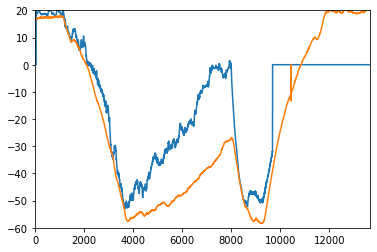

In [217]:
def plot_yx(y, x= time):
  plt.xlim(min(x), max(x))
  plt.ylim(min(y)-5, max(y)+5)
  plt.plot(x, y)

def liste_strecken(liste,faktor = 0.5,refliste = time ):
  dif = len(refliste) - len(liste)
  pre = int(faktor*dif)
  after = dif-pre
  print(pre, after)
  return [0]*(pre) +liste + [0]*after

plt.xlim(0, max(time))
plt.ylim(-60,20)
plt.plot(time, liste_strecken(ino_temp, 0.01))
plt.plot(time, twotofive(strato_temp))
plt.show()